In [1]:
import torch 
import torch.nn as nn
from torch.autograd import Variable
from torchvision import models,transforms,utils
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torch.optim import SGD
import copy


In [2]:
def open_image(path):
    img=Image.open(path)
    plt.imshow(img)
    return img

normalise=transforms.Normalize(
    mean=[0.485,0.456,0.406],
    std=[0.229,0.224,0.225]
)

process=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    normalise
])

def orig_im(image):
    reverse_mean = [-0.485, -0.456, -0.406]
    reverse_std = [1/0.229, 1/0.224, 1/0.225]
    recreated_im = copy.copy(image.data.numpy()[0])
    for c in range(3):
        recreated_im[c] /= reverse_std[c]
        recreated_im[c] -= reverse_mean[c]
    recreated_im[recreated_im > 1] = 1
    recreated_im[recreated_im < 0] = 0
    recreated_im = np.round(recreated_im * 255)

    recreated_im = np.uint8(recreated_im).transpose(1, 2, 0)
    return recreated_im

 

In [3]:
mdl=models.vgg16(pretrained=True)
print(mdl)
ftrs=models.vgg16(pretrained=True).features

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [4]:
def Deep_dreamer(image,layern,iteration,lr1):
    input = Variable(process(image).unsqueeze(0), requires_grad=True)
    optimizer=SGD([input],lr1,weight_decay=1e-4)
    for i in range(iteration):
        optimizer.zero_grad()
        x=input
        for index,layer in enumerate(ftrs):
            x=layer(x)
            if(index==layern):
                break
        loss=x.norm()
        loss.backward()
        optimizer.step()
    im1 = orig_im(input)
    plt.imshow(im1)


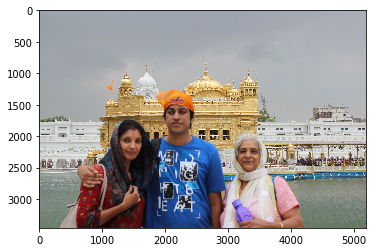

In [ ]:
shoi=open_image("D:/Python/rename1.jpg")

In [ ]:
Deep_dreamer(shoi,14,50,0.5)


7